Startar med att Läsa in datasetet och utforska datan 

In [ ]:
import pandas as pd

# Jag läser in datasetet
file_path = "../data/seattle-weather.csv" 
df = pd.read_csv(file_path)

# Och visar dom första raderna
df.head()


Slutsats för ovanstående:

Datasetet innehåller 6 kolumner:

date: Datum för observationen.
precipitation: Nederbörd (i mm).
temp_max och temp_min: Högsta och lägsta temperaturer (i °C).
wind: Vindhastighet (i m/s).
weather: Typ av väder (t.ex. "drizzle", "rain").
Vid första anblick verkar datasetet ha rena kolumnnamn och en rimlig struktur. Datatypen för varje kolumn bör bekräftas i nästa steg (df.info()) för att säkerställa att det kan användas i modelleringen.

In [ ]:
import pandas as pd

file_path = "../data/seattle-weather.csv" 
df = pd.read_csv(file_path)

df.info()

df.isnull().sum()

Datasetet innehåller 1461 poster och 6 kolumner. Alla kolumner är fyllda med data (ingen saknad information , nullvärden). Kolumnerna precipitation, temp_max, temp_min, och wind är numeriska och är redan av rätt datatyp (float64), medan date och weather är av typen object. För att kunna hantera datum korrekt under analysen bör date-kolumnen konverteras till ett datetime-format. Jag kommer att utföra den konverteringen i nästa steg.

In [ ]:
import pandas as pd

file_path = "../data/seattle-weather.csv" 
df = pd.read_csv(file_path)


df["date"] = pd.to_datetime(df["date"])

df.info()

df.isnull().sum()

Dataförberedelse och Första Analys

I detta första steget av projektet har jag börjat med att ladda in och utforska väderdatasetet från Kaggle, vilket innehåller historiska väderdata för Seattle. Datasetet har 1461 rader och 6 kolumner, som representerar: 

date: Datumet för vädermätningen (initialt i objektformat, men konverterat till datetime).
precipitation: Nederbördsmängd (i mm).
temp_max: Maximal temperatur under dagen (i °C).
temp_min: Minsta temperatur under dagen (i °C).
wind: Vindhastighet (i m/s).
weather: En kategori som beskriver väderförhållandena (t.ex. regn, sol, dimma).

Efter att ha läst in datasetet och visat dom först fem raderna, som bekräftar att datan ser ut att vara i rätt format , genomförde jag några grundläggande undersökningar: 

Datatyper: Jag kontrollerade datatyperna för varje kolumn och såg att den ursprungliga date-kolumnen var av typen object, vilket inte är optimalt för tidsanalys. För att åtgärda detta konverterade jag kolumnen till datatypen datetime64, vilket nu gör att jag kan arbeta med tidserier på ett effektivt sätt.

Null-värden: Jag kontrollerade också om datasetet innehöll saknade värden (null-värden). Enligt resultaten finns det inga saknade värden i någon av kolumnerna, vilket innebär att datan är komplett och redo för vidare bearbetning.

Minne och effektivitet: Med hjälp av df.info() fick jag också en översikt av minnesanvändningen och såg att datasetet är relativt litet (68.6 KB), vilket innebär att det är lätt att arbeta med i de kommande stegen.

Sammanfattningsvis så har jag genomfört en inledande datainspektion och förberedelse, inklusive konvertering av datatyper och kontroll av null-värden. Datan verkar vara ren och i rätt format, vilket gör att jag nu kan fortsätta med att genomföra mer djupgående analyser och visualiseringar för att undersöka vädermönster över tid.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "../data/seattle-weather.csv" 
df = pd.read_csv(file_path)

df["date"] = pd.to_datetime(df["date"])

df.info()

df.isnull().sum()

plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temperature', color='r')
plt.plot(df['date'], df['temp_min'], label='Min Temperature', color='b')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Variation Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sammanfattning av datahanteringen och visualisering: 

I denna sektion av projektet har jag läst in datasetet seattle-weather.csv och utfört några grundläggande datahanteringssteg. Först konverterades "date"-kolumnen till datetime-format, vilket är nödvändigt för att arbeta med tidsseriedata. Jag har också utfört en grundläggande analys av datasetet med hjälp av metoderna df.info() och df.isnull().sum(), vilket bekräftade att alla kolumner innehåller fullständiga uppsättningar av data (utan saknade värden), och att datatyperna är korrekt identifierade.

För att få en överblick av temperaturvariationer över tid visualiserades maximala och minimi temperaturer med hjälp av matplotlib. Grafen visar hur temperaturerna varierar under den tidsperiod som datasetet täcker, vilket ger en första inblick i vädermönstren i Seattle.

Modellträning 

Förbereda data för modellträning.
Jag kommer att välja funktioner och målvariabel samt dela upp data i tränings och test uppsätningar genom att använda train_test_split från sklearn.model_selection för att skapa tränings- och testuppsättningar.
     

In [ ]:
from sklearn.model_selection import train_test_split

# Välj funktioner och målvariabel
# Här använder jag 'precipitation' och 'wind' för att förutspå 'temp_max'
X = df[['precipitation', 'wind']]  
y = df['temp_max']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Träningsdata (features):")
print(X_train.head())

print("Träningsdata (målvariabel):")
print(y_train.head())


Bygga en modell

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Slutsats:
Modellen är inte särskilt effektiv i sin nuvarande form, och R²-värdet tyder på att de valda funktionerna (precipitation och vind) inte förklarar mycket av variationen i max-temperaturen.
Det kan vara värt att försöka andra funktioner eller mer avancerade modeller för att förbättra resultatet.

Försöker till att förbättra modellen 

Steg 1: Lägg till fler funktioner
Jag kan inkludera fler funktioner som kan ha en starkare relation till temperaturen, såsom 'temp_min' och 'weather'. Dessa kan potentiellt förbättra förutsägelserna eftersom jag nu använder mer information om vädret.

Steg 2: Förbehandling av 'weather' (om det behövs)
'weather' är en kategorisk variabel (med text som "rain", "drizzle" etc.), så jag kanske måste omvandla den till numeriska värden innan jag kan använda den i modellen. En vanlig metod verkar vara att använda One Hot Encoding, som skapar en ny kolumn för varje kategori.

Steg 3: Prova en mer avancerad modell
Jag kan byta från en enkel linjär regression till en mer kraftfull modell som Random Forest eller Gradient Boosting. Dessa modeller är bra för att hantera komplexa samband i datan.

Jag börjar med att implementera detta för att se om resultatet blir bättre:
Lägg till fler funktioner (temp_min, weather)
Omvandla 'weather' till numeriska värden med One Hot Encoding
Byt till en Random Forest Regressor för att göra förutsägelser

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

X = df[['precipitation', 'wind', 'temp_min', 'weather']]  
y = df['temp_max']


X = pd.get_dummies(X, columns=['weather'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Analys av förbättringen 

Fler funktioner: Genom att inkludera in temp_min och bearbeta weather som en variabel verkar modellen kunna dra nytta av mer relevant information. Samt Random Forest modellen verkar hantera icke-linjära samband bättre än en linjär regressionsmodell kunde vilket verkar leda till en högre precision.



Visualisering av faktiska och predicerade värden

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='Perfekt linje')
plt.xlabel('Faktiska värden (temp_max)')
plt.ylabel('Predicerade värden (temp_max)')
plt.title('Faktiska vs. Predicerade värden')
plt.legend()
plt.tight_layout()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('Residualer (Faktiska - Predicerade)')
plt.ylabel('Antal')
plt.title('Histogram av residualer')
plt.tight_layout()
plt.show()


Sammanfattning: 

Scatterplot: Faktiska vs. Predicerade värden
Korrelation mellan faktiska och predicerade värden:

Punkterna verkar ligga nära den röda, perfekta linjen, vilket indikerar att modellen presterar bra på att förutsäga temp_max baserat på precipitation och wind.
Dock verkar det finnas vissa avvikelser, särskilt längst ner och högst upp i skalan, vilket kan tyda på att modellen har svårigheter att hantera vissa extremer i data.
Modellens träffsäkerhet:

Generellt sett verkar modellen förutspå värden med god noggrannhet, men det finns vissa punkter långt från linjen som tyder på några större avvikelser.

Histogram: Residualer
Residualfördelning:

Histogrammet visar en relativt symmetrisk och centrerad fördelning kring 0, vilket jag uppfattar är ett bra tecken.
Detta indikerar att modellen inte är systematiskt partisk åt ett håll (t.ex. att den konsekvent över- eller underskattar).
Spridning av residualerna:

Majoriteten av residualerna ligger nära 0, vilket innebär att modellen oftast gör små fel. Det finns dock några större fel (både positiva och negativa), vilket kan tyda på att vissa datapunkter är svårare för modellen att förutsäga.

Sammanfattning av slutsatser:
Styrkor: Modellen presterar mycket bra och har en hög R² (0.84). Den kan på ett tillförlitligt sätt förutspå temp_max för majoriteten av datapunkterna.
Svagheter: Det finns några avvikande datapunkter (outliers) och vissa extremvärden där modellen inte presterar lika bra. 


Med något förbättrad felhantering och validering nedan.

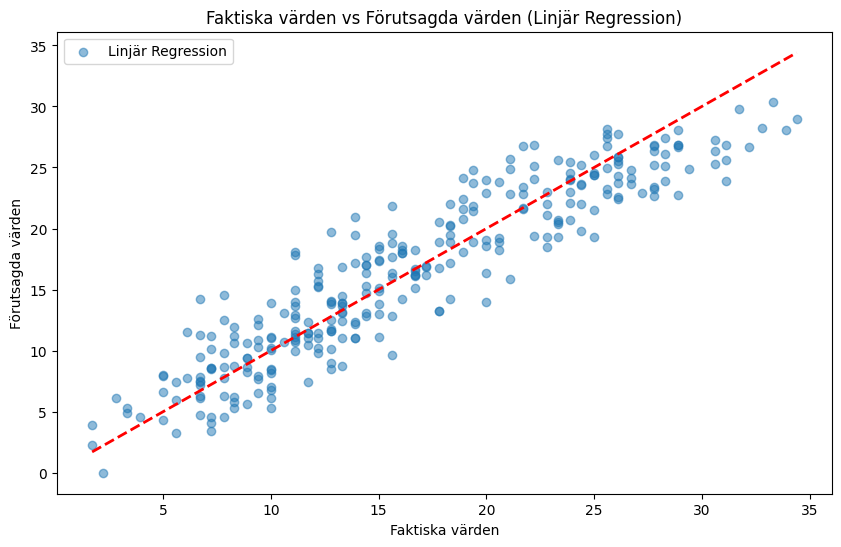

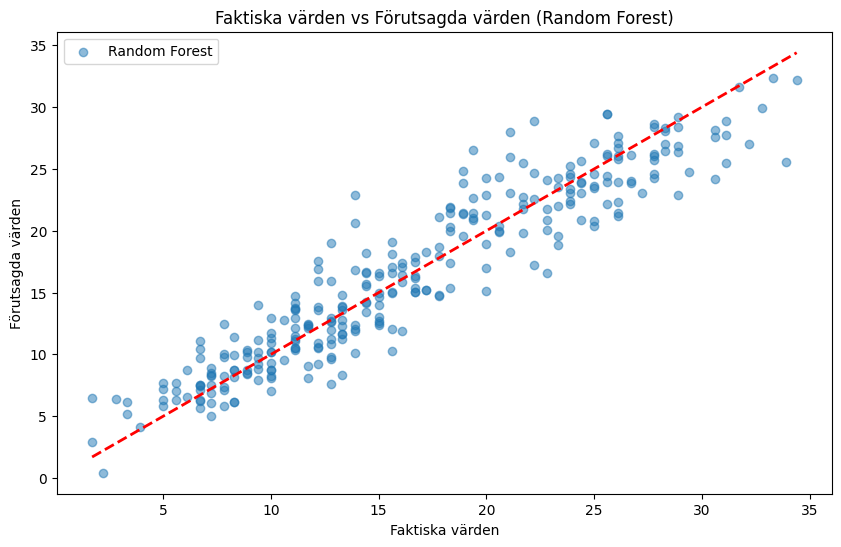

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

file_path = "../data/seattle-weather.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Filen {file_path} hittades inte.")
    raise
except pd.errors.EmptyDataError:
    print("Filen är tom.")
    raise
except pd.errors.ParserError:
    print("Filen kunde inte parsas.")
    raise

required_columns = ['date', 'temp_max']
for col in required_columns:
    if col not in df.columns:
        raise KeyError(f"Kolumnen '{col}' saknas i datasetet.")

if df.isnull().values.any():
    print("Datasetet innehåller tomma värden. Hanterar dessa...")
    df = df.dropna()

try:
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df = df.drop('date', axis=1)
except KeyError:
    print("Datumkolumnen saknas i datasetet.")
    raise

df = pd.get_dummies(df, columns=['weather'], drop_first=True)

try:
    X = df.drop('temp_max', axis=1)  
    y = df['temp_max']  
except KeyError:
    print("Kolumnen 'temp_max' saknas i datasetet.")
    raise

# Dela upp mitt data i tränings- och testuppsättningar (80% träning, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)
y_pred_lin_reg = lin_reg_model.predict(X_test_scaled)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin_reg, alpha=0.5, label='Linjär Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Faktiska värden')
plt.ylabel('Förutsagda värden')
plt.title('Faktiska värden vs Förutsagda värden (Linjär Regression)')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Faktiska värden')
plt.ylabel('Förutsagda värden')
plt.title('Faktiska värden vs Förutsagda värden (Random Forest)')
plt.legend()
plt.show()